In [147]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Inspect Data:

Use pandas to load the IMDB Movie Dataset.
Inspect the data to understand its structure and contents.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

print("Path to dataset files:", path)

100%|██████████| 175k/175k [00:00<00:00, 518kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/versions/1


In [3]:
from google.colab import files
files.upload()

Saving IMDB.zip to IMDB.zip


{'IMDB.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00y<ARXk\xc7\xe2\xff\xff\xff\xff\xff\xff\xff\xff\x11\x00\x14\x00imdb_top_1000.csv\x01\x00\x10\x00P\xaf\x06\x00\x00\x00\x00\x00\x92\xbb\x02\x00\x00\x00\x00\x00\xac\xbd\xcbr"\xdb\x96-\xd8/\xb3\xfb\x0fn\xb22\xdbu\xcd\\Jp\xde\xa7\x1a\x95(\x90\x08\x14rWHB\xe2@\xe7\xd8\x02\\\xb8\x83?8\xfe\x08\x04?p\xad~\xa0\xdaU\x8d\xb2\xba\xd9\xa8^Z=,\xb3\x95\xf1cw\x8c\xb9\xdc\x11z\xc4\x8e\xe0\xc4\xcd<{o\t\x81\x03>\xd7\x9cs\xcc\xd7\x98_\xe34s\x93\xbf]\xfb\xd1\xca\xbcw\x13\xdfM\xff6\xf4\xb3\xc05\xef\xdc\xc0U\xa9;\xff\xdb\xd8U\x89\xf9\xc9M2\xff\xc9\x9f\xa9\x0c\x7f\xc9\xa3\xcc\x0f]\xb3\xefF\x89k\x0e\xec\xde\xf9\xdf\xeeT\xe6G\x0b\xf3\xe6\x9b\x9b|\xf3\xdd\x8di\xbb\x99\xfa[:\x8b\xf1\xf7\x9e\x9f\xb8\xb3,N\xcc\xfbL%U\xf9\xb7%\xff\xae\xc9\xbf\xeb\xa6\x13\xff-~\xfa\xdbc\x9c\xb9\xa9\xd9O\xe24\xfdO\xff\xc3\x89\x97e\xeb\xf4/\xff\xf4O\xe1Y\xe8\xce}u\xaaB\xb5\x8b\xa3\xb3Y\x1c\xfe\x93\x1f\xaa\x85\x9b\xfe\x93\xfdO\xf6c\xe3\xdc\xee]\xae\xc6\xc3Y\xc5\xee_d\x93\xd0\xf1\xecO\x95\xca\x

In [4]:
!unzip IMDB.zip

Archive:  IMDB.zip
  inflating: imdb_top_1000.csv       


In [7]:
df = pd.read_csv("imdb_top_1000.csv")

# Data Preprocessing:

Handle missing values and convert data types as needed.

In [55]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,genre_list,main_genre,runtime_normalized,No_of_Votes_log,No_of_Votes_standardized
0,The Shawshank Redemption,1994-01-01,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,[Drama],Drama,0.351449,14.666990,2.463975
1,The Godfather,1972-01-01,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"[Crime, Drama]",Crime,0.471014,14.298164,2.134785
2,The Dark Knight,2008-01-01,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"[Action, Crime, Drama]",Action,0.387681,14.649824,2.448654
3,The Godfather: Part II,1974-01-01,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,"[Crime, Drama]",Crime,0.568841,13.937687,1.813048
4,12 Angry Men,1957-01-01,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,"[Crime, Drama]",Crime,0.184783,13.444224,1.372616


**# Main preprocessing steps:**

Handle missing values.

Convert data types appropriately.

Normalize numerical features.

Encode categorical variables.

Feature engineering.

Remove duplicates.


In [9]:
df.drop(['Poster_Link', 'Certificate', 'Overview'], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Series_Title        1000 non-null   object 
 1   Released_Year       1000 non-null   object 
 2   Runtime             1000 non-null   int64  
 3   Genre               1000 non-null   object 
 4   IMDB_Rating         1000 non-null   float64
 5   Meta_score          1000 non-null   float64
 6   Director            1000 non-null   object 
 7   Star1               1000 non-null   object 
 8   Star2               1000 non-null   object 
 9   Star3               1000 non-null   object 
 10  Star4               1000 non-null   object 
 11  No_of_Votes         1000 non-null   int64  
 12  Gross               1000 non-null   float64
 13  genre_list          1000 non-null   object 
 14  main_genre          1000 non-null   object 
 15  runtime_normalized  1000 non-null   float64
dtypes: floa

In [31]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean()) #Handle missing values.

In [34]:
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '')

In [35]:
df['Gross'] = pd.to_numeric(df['Gross'])

In [36]:
df['Gross'] = df['Gross'].fillna(df['Gross'].mean()) #Handle missing values.

In [40]:
df['Released_Year'] = df['Released_Year'].str.split('-').str[0]

In [46]:
df['Released_Year'].unique()

<DatetimeArray>
['1994-01-01 00:00:00', '1972-01-01 00:00:00', '2008-01-01 00:00:00',
 '1974-01-01 00:00:00', '1957-01-01 00:00:00', '2003-01-01 00:00:00',
 '1993-01-01 00:00:00', '2010-01-01 00:00:00', '1999-01-01 00:00:00',
 '2001-01-01 00:00:00', '1966-01-01 00:00:00', '2002-01-01 00:00:00',
 '1990-01-01 00:00:00', '1980-01-01 00:00:00', '1975-01-01 00:00:00',
 '2020-01-01 00:00:00', '2019-01-01 00:00:00', '2014-01-01 00:00:00',
 '1998-01-01 00:00:00', '1997-01-01 00:00:00', '1995-01-01 00:00:00',
 '1991-01-01 00:00:00', '1977-01-01 00:00:00', '1962-01-01 00:00:00',
 '1954-01-01 00:00:00', '1946-01-01 00:00:00', '2011-01-01 00:00:00',
 '2006-01-01 00:00:00', '2000-01-01 00:00:00', '1988-01-01 00:00:00',
 '1985-01-01 00:00:00', '1968-01-01 00:00:00', '1960-01-01 00:00:00',
 '1942-01-01 00:00:00', '1936-01-01 00:00:00', '1931-01-01 00:00:00',
 '2018-01-01 00:00:00', '2017-01-01 00:00:00', '2016-01-01 00:00:00',
 '2012-01-01 00:00:00', '2009-01-01 00:00:00', '2007-01-01 00:00:00',
 '19

In [44]:
df.drop(df[df['Released_Year'] == 'PG'].index, inplace=True)

In [45]:
df['Released_Year'] = pd.to_datetime(df['Released_Year'])  # Normaliz datetime

In [66]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,runtime_normalized,No_of_Votes_log,No_of_Votes_standardized,IMDB_Rating_normalized,Meta_score_normalized
count,999,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1991-03-21 11:00:10.810810880,122.873874,7.949650,77.972503,273697.411411,67928841.782429,0.282152,11.906335,0.000000,0.205676,0.694063
min,1920-01-01 00:00:00,45.000000,7.600000,28.000000,25088.000000,1305.000000,0.000000,10.130185,-1.585272,0.000000,0.000000
25%,1976-01-01 00:00:00,103.000000,7.700000,72.000000,55471.500000,5011838.500000,0.210145,10.923641,-0.877087,0.058824,0.611111
50%,1999-01-01 00:00:00,119.000000,7.900000,77.971530,138356.000000,42340598.000000,0.268116,11.837593,-0.061355,0.176471,0.694049
75%,2009-01-01 00:00:00,137.000000,8.100000,85.500000,374477.500000,68034750.873646,0.333333,12.833288,0.827336,0.294118,0.798611
max,2020-01-01 00:00:00,321.000000,9.300000,100.000000,2343110.000000,936662225.000000,1.000000,14.666990,2.463975,1.000000,1.000000
std,NaN,28.102520,0.275407,11.367710,327536.646300,100031078.462744,0.101821,1.120968,1.000501,0.162004,0.157885


In [12]:
df_copy = df.copy()

In [15]:
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [13]:
df['genre_list'] = df['Genre'].str.split(', ')

In [14]:
df['main_genre'] = df['Genre'].str.split(', ').str[0]

In [17]:
df['Runtime'].unique()

array([142, 175, 152, 202,  96, 201, 154, 195, 148, 139, 178, 161, 179,
       136, 146, 124, 133, 160, 132, 153, 169, 130, 125, 189, 116, 127,
       118, 121, 207, 122, 106, 112, 151, 150, 155, 119, 110,  88, 137,
        89, 165, 109, 102,  87, 126, 147, 117, 181, 149, 105, 164, 170,
        98, 101, 113, 134, 229, 115, 143,  95, 104, 123, 131, 108,  81,
        99, 114, 129, 228, 128, 103, 107,  68, 138, 156, 167, 163, 186,
       321, 135, 140, 180, 158, 210,  86, 162, 177, 204,  91, 172,  45,
       145, 100, 196,  93, 120,  92, 144,  80, 183, 111, 141, 224, 171,
       188,  94, 185,  85, 205, 212, 238,  72,  67,  76, 159,  83,  90,
        84, 191, 197, 174,  97,  75, 157, 209,  82, 220,  64, 184, 168,
       166, 192, 194, 193,  69,  70, 242,  79,  71,  78])

In [16]:
df['Runtime']=df['Runtime'].str.replace(' min', '').astype(int) #Normalizing time

In [48]:
scaler = MinMaxScaler()
df['runtime_normalized'] = scaler.fit_transform(df[['Runtime']])


In [53]:

df['No_of_Votes'].describe()

,No_of_Votes
count,9.990000e+02
mean,2.736974e+05
std,3.275366e+05
min,2.508800e+04
25%,5.547150e+04
50%,1.383560e+05
75%,3.744775e+05
max,2.343110e+06


In [64]:
df['No_of_Votes_log'] = np.log(df['No_of_Votes'] + 1)  #Standartiz
scaler = StandardScaler()
df['No_of_Votes_standardized'] = scaler.fit_transform(df[['No_of_Votes_log']])

In [65]:

df['No_of_Votes_standardized'].describe()

,No_of_Votes_standardized
count,999.000000
mean,0.000000
std,1.000501
min,-1.585272
25%,-0.877087
50%,-0.061355
75%,0.827336
max,2.463975


In [61]:
scaler = MinMaxScaler()
df['IMDB_Rating']=df['IMDB_Rating'].astype(float)
df['Meta_score']=df['Meta_score'].astype(float)
df['IMDB_Rating_normalized'] = scaler.fit_transform(df[['IMDB_Rating']])
df['Meta_score_normalized'] = scaler.fit_transform(df[['Meta_score']])

In [146]:
df_encoded = df.copy()


In [148]:
le = LabelEncoder()
for col in ['Star1', 'Star2', 'Star3', 'Star4']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [172]:
df['Gross_normalized'] = scaler.fit_transform(df[['Gross']])

In [72]:
df['Series_Title'].duplicated().sum()   #Delete dup

1

In [73]:
df.drop_duplicates(subset='Series_Title', keep='first', inplace=True)

# **Rating Trends Over Years:**

Create a line plot with Matplotlib showing trends in IMDB_Rating over the years.

In [77]:
df.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'Gross', 'genre_list', 'main_genre',
       'runtime_normalized', 'No_of_Votes_log', 'No_of_Votes_standardized',
       'IMDB_Rating_normalized', 'Meta_score_normalized'],
      dtype='object')

In [108]:
plt.style.use('ggplot')

In [103]:
df['unique_years'] = pd.to_datetime(df['Released_Year']).dt.year
df['unique_years'] = df['unique_years'].astype(int)

In [104]:
filtered_df = df[df['unique_years'] >= 2010]
yearly_avg_rating = filtered_df.groupby('unique_years')['IMDB_Rating'].mean()

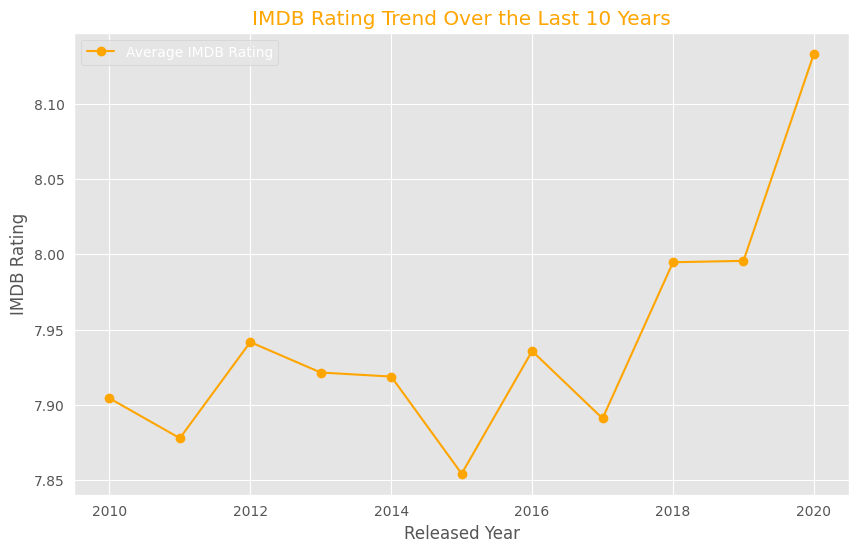

In [113]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_rating.index, yearly_avg_rating.values, marker='o', linestyle='-', color ='orange', label='Average IMDB Rating')

plt.xlabel('Released Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Rating Trend Over the Last 10 Years', color='orange')
plt.legend()
plt.grid(True)
plt.show()

# Genre Popularity Analysis:

Generate a Seaborn bar plot to compare the number of movies across different genres.

In [116]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,...,No_of_Votes,Gross,genre_list,main_genre,runtime_normalized,No_of_Votes_log,No_of_Votes_standardized,IMDB_Rating_normalized,Meta_score_normalized,unique_years
0,The Shawshank Redemption,1994-01-01,142,Drama,9.300000,80.000000,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,2343110,28341469.000000,[Drama],Drama,0.351449,14.666990,2.463975,1.000000,0.722222,1994
1,The Godfather,1972-01-01,175,"Crime, Drama",9.200000,100.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,1620367,134966411.000000,"[Crime, Drama]",Crime,0.471014,14.298164,2.134785,0.941176,1.000000,1972
2,The Dark Knight,2008-01-01,152,"Action, Crime, Drama",9.000000,84.000000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,2303232,534858444.000000,"[Action, Crime, Drama]",Action,0.387681,14.649824,2.448654,0.823529,0.777778,2008
3,The Godfather: Part II,1974-01-01,202,"Crime, Drama",9.000000,90.000000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,1129952,57300000.000000,"[Crime, Drama]",Crime,0.568841,13.937687,1.813048,0.823529,0.861111,1974
4,12 Angry Men,1957-01-01,96,"Crime, Drama",9.000000,96.000000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,689845,4360000.000000,"[Crime, Drama]",Crime,0.184783,13.444224,1.372616,0.823529,0.944444,1957


In [117]:
unique_genres = df['main_genre'].unique()

In [118]:
unique_genres

array(['Drama', 'Crime', 'Action', 'Biography', 'Western', 'Comedy',
       'Adventure', 'Animation', 'Horror', 'Mystery', 'Film-Noir',
       'Fantasy', 'Family', 'Thriller'], dtype=object)

In [121]:
counts = df['main_genre'].value_counts()
counts

,count
main_genre,
Drama,289
Action,172
Comedy,155
Crime,106
Biography,88
Animation,82
Adventure,71
Mystery,12
Horror,11


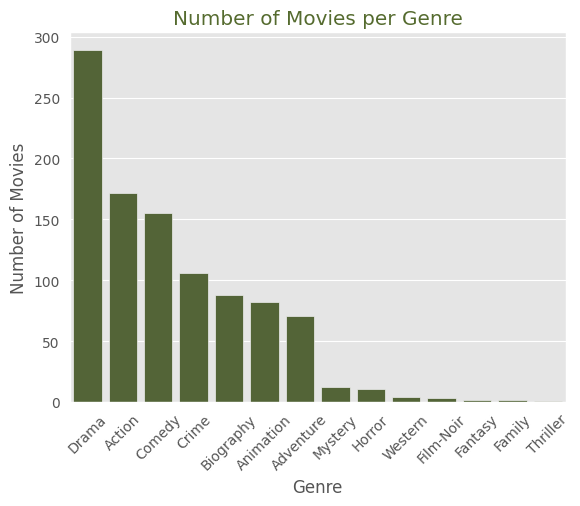

In [128]:
sns.barplot(x=counts.index, y=counts.values, color = '#556B2F' )
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre', color = '#556B2F')
plt.show()


# Director’s Impact on Ratings:

Use a Matplotlib scatter plot to examine the relationship between directors and movie ratings.

In [164]:
top_directors = df['Director'].value_counts().head(20)
tail_directors = df['Director'].value_counts().tail(10)

In [167]:
director_ratings = df.groupby('Director')['IMDB_Rating'].mean()
director_ratings = director_ratings[director_ratings.index.isin(top_directors.index)]

In [168]:
group_dir = df.groupby('Director')['IMDB_Rating_normalized'].mean()
group_dir = group_dir[group_dir.index.isin(top_directors.index)]

Text(0, 0.5, 'Average IMDB Rating')

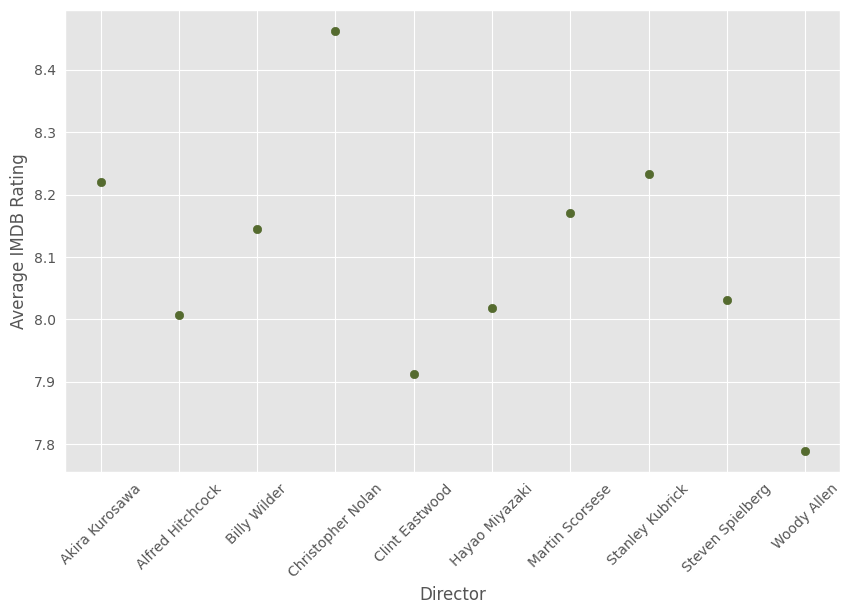

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(director_ratings.index, director_ratings.values, color='#556B2F')
plt.xticks(rotation=45)
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')

In [143]:
directors = df['Director'].unique()
director_to_index = {director: idx for idx, director in enumerate(directors)}
df['Director_Index'] = df['Director'].map(director_to_index)


In [158]:
df.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'No_of_Votes', 'Gross', 'genre_list', 'main_genre',
       'runtime_normalized', 'No_of_Votes_log', 'No_of_Votes_standardized',
       'IMDB_Rating_normalized', 'Meta_score_normalized', 'unique_years',
       'Director_Index'],
      dtype='object')

Text(0.5, 1.0, 'Director Impact on Ratings')

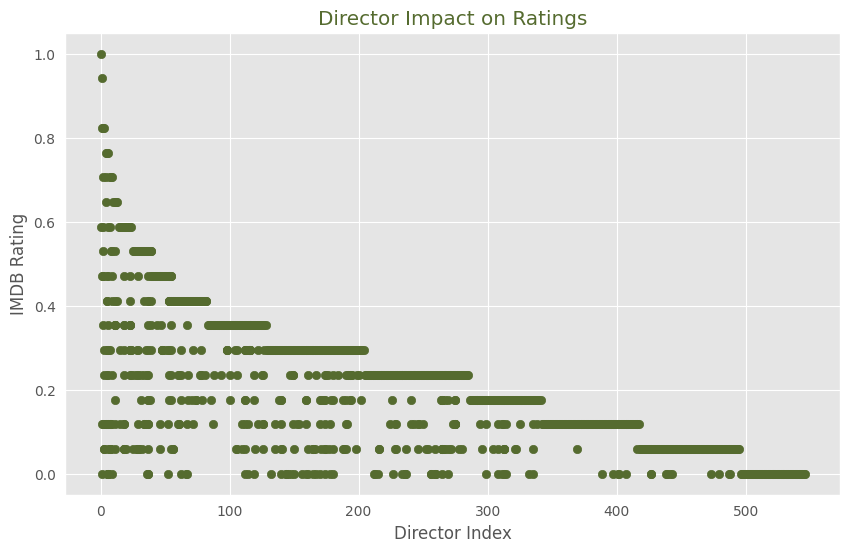

In [159]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Director_Index'], df['IMDB_Rating_normalized'], color='#556B2F')
plt.xlabel('Director Index')
plt.ylabel('IMDB Rating')
plt.title('Director Impact on Ratings', color='#556B2F')

# Star Power Analysis:

Employ a Seaborn pairplot to explore relationships involving Stars and their impact on IMDB_Rating and Gross.

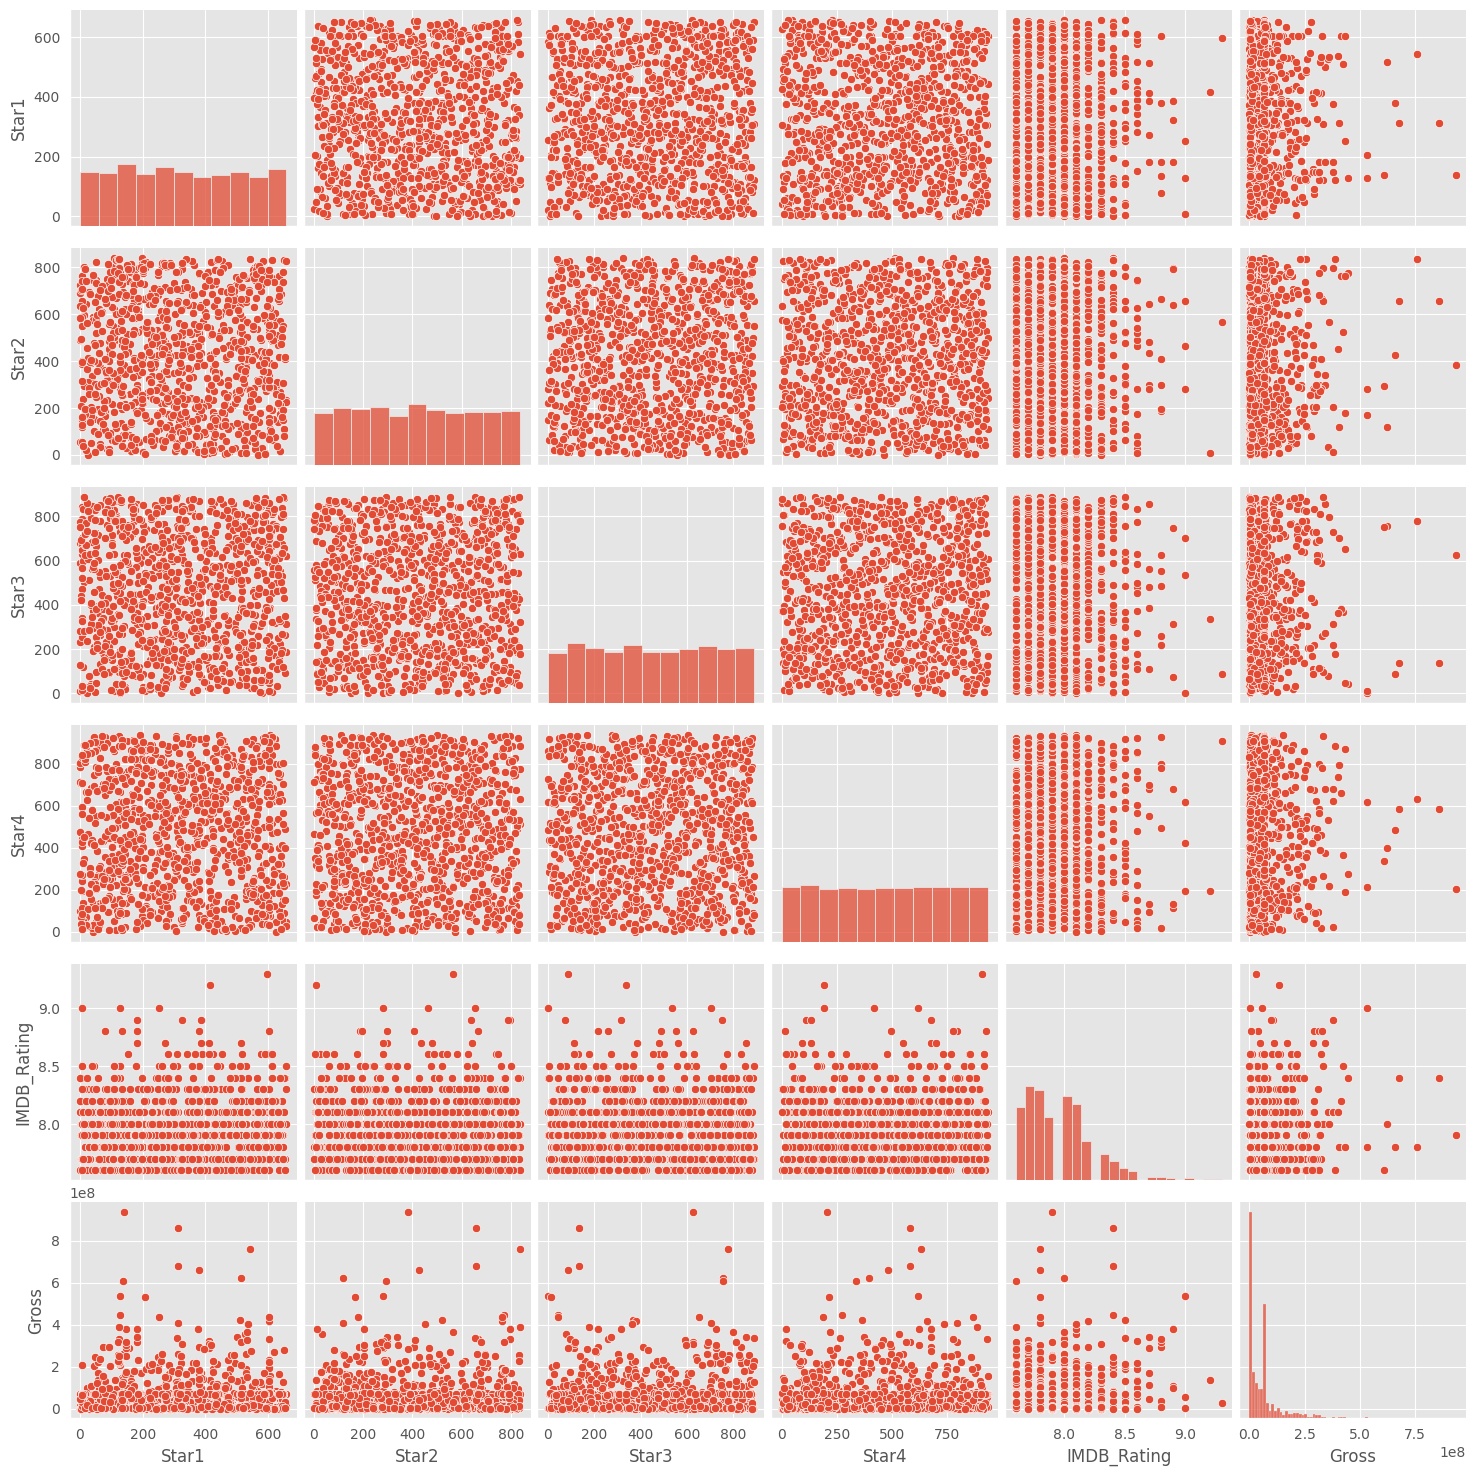

In [149]:
sns.pairplot(df_encoded[['Star1', 'Star2', 'Star3', 'Star4', 'IMDB_Rating_normalized', 'Gross']])
plt.show()

 I didn't get any insights, looking at this graph but it seems right, or not ?

Box Plot of Genres vs. Ratings:

Visualize the distribution of IMDB_Rating across different Genres using a Seaborn box plot.

Text(0, 0.5, 'IMDB Rating')

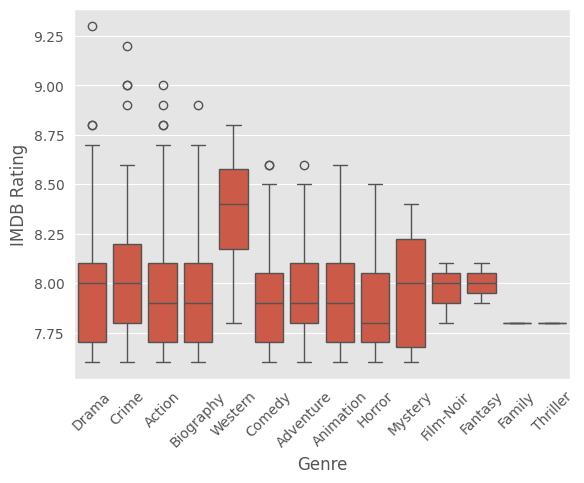

In [157]:
sns.boxplot(x='main_genre', y='IMDB_Rating', data=df)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('IMDB Rating')

# Correlation Heatmap:

Create a heatmap using Seaborn to identify correlations between numerical columns like IMDB_Rating, Meta_score, No_of_votes, and Gross.

In [174]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,...,genre_list,main_genre,runtime_normalized,No_of_Votes_log,No_of_Votes_standardized,IMDB_Rating_normalized,Meta_score_normalized,unique_years,Director_Index,Gross_normalized
0,The Shawshank Redemption,1994-01-01,142,Drama,9.300000,80.000000,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,...,[Drama],Drama,0.351449,14.666990,2.463975,1.000000,0.722222,1994,0,-0.396513
1,The Godfather,1972-01-01,175,"Crime, Drama",9.200000,100.000000,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,...,"[Crime, Drama]",Crime,0.471014,14.298164,2.134785,0.941176,1.000000,1972,1,0.669646
2,The Dark Knight,2008-01-01,152,"Action, Crime, Drama",9.000000,84.000000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,...,"[Action, Crime, Drama]",Action,0.387681,14.649824,2.448654,0.823529,0.777778,2008,2,4.668229
3,The Godfather: Part II,1974-01-01,202,"Crime, Drama",9.000000,90.000000,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,...,"[Crime, Drama]",Crime,0.568841,13.937687,1.813048,0.823529,0.861111,1974,1,-0.106953
4,12 Angry Men,1957-01-01,96,"Crime, Drama",9.000000,96.000000,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,...,"[Crime, Drama]",Crime,0.184783,13.444224,1.372616,0.823529,0.944444,1957,3,-0.636308


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

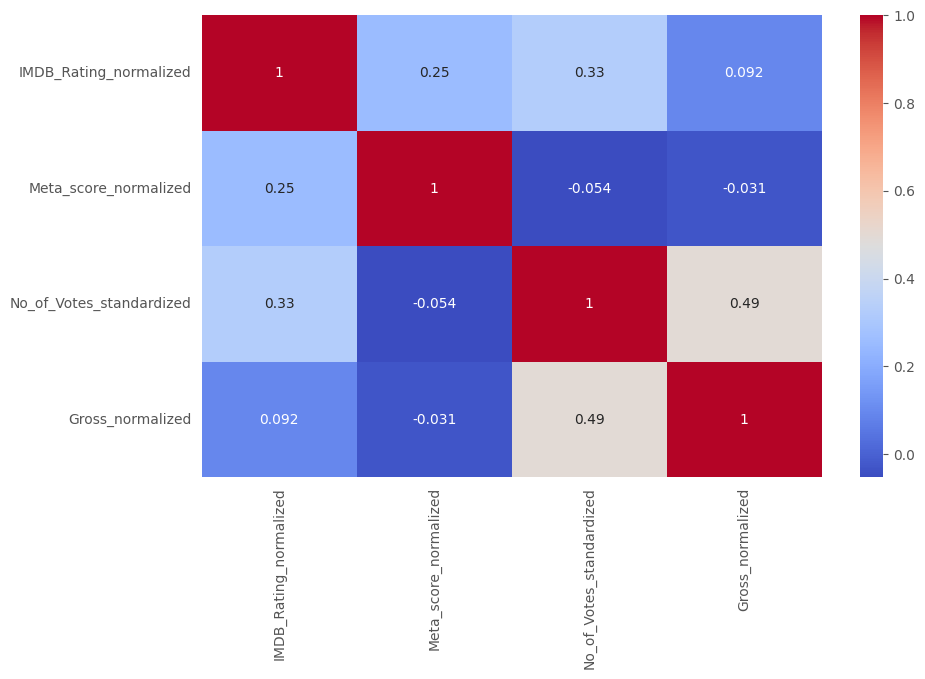

In [175]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['IMDB_Rating_normalized', 'Meta_score_normalized', 'No_of_Votes_standardized', 'Gross_normalized']].corr(), annot=True, cmap='coolwarm')
plt